In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

pd.set_option("display.float_format", lambda x: "%.8f" % x)
%load_ext lab_black
%load_ext nb_black
%matplotlib inline

---
# Fetching decoded ADS-B data

In [2]:
from pymodes_opensky import OpenskyImpalaWrapper

opensky = OpenskyImpalaWrapper()

**Server connection successful!


## Example flight 1

In [3]:
# Flight-1
df_adsb = opensky.query(
    type="adsb", start="2019-07-07 11:00:00", end="2019-07-07 13:30:00", icao24="4844C6"
)

**Obtaining details of the query...
**OpenSky Impala: 7369 of records found.
**Fetching records...
**Records downloaded.


In [4]:
print(df_adsb.columns.tolist())

['time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'vertrate', 'callsign', 'onground', 'alert', 'spi', 'squawk', 'baroaltitude', 'geoaltitude', 'lastposupdate', 'lastcontact', 'hour']


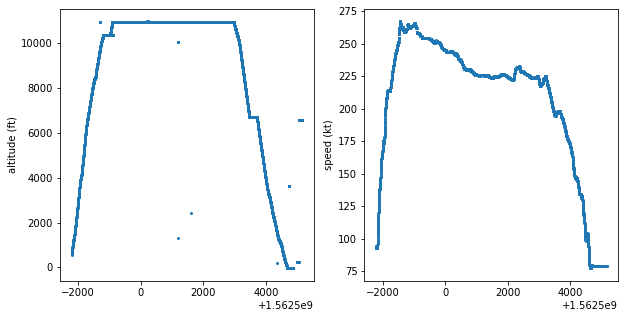

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(df_adsb.time, df_adsb.baroaltitude, marker=".", lw=0)
plt.ylabel("altitude (ft)")

plt.subplot(122)
plt.scatter(df_adsb.time, df_adsb.velocity, marker=".", lw=0)
plt.ylabel("speed (kt)")
plt.show()

## Example flight 2

In [6]:
# Flight-2
df_adsb = opensky.query(
    type="adsb", start="2019-09-09 08:00:00", end="2019-09-09 12:00:10", icao24="4C01E4"
)

**Obtaining details of the query...
**OpenSky Impala: 6158 of records found.
**Fetching records...
**Records downloaded.


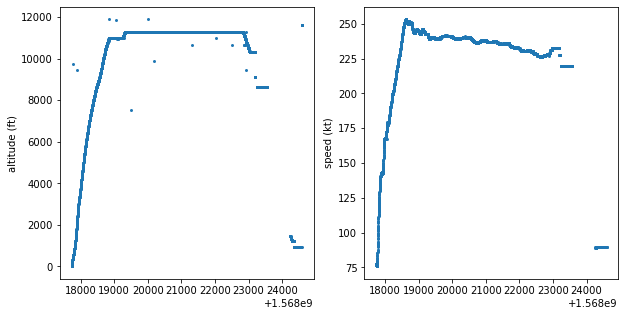

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(df_adsb.time, df_adsb.baroaltitude, marker=".", lw=0)
plt.ylabel("altitude (ft)")

plt.subplot(122)
plt.scatter(df_adsb.time, df_adsb.velocity, marker=".", lw=0)
plt.ylabel("speed (kt)")
plt.show()

---
# RAW Mode-S data

In [8]:
df_raw = opensky.query(
    type="raw", start="2019-07-07 11:00:00", end="2019-07-07 13:30:00", icao24="4844C6"
)

**Obtaining details of the query...
**OpenSky Impala: 32380 of records found.
**Fetching records...
**Records downloaded.


In [9]:
print(df_raw.columns.tolist())

['rawmsg', 'mintime', 'maxtime', 'msgcount', 'icao24', 'message', 'isid', 'flightstatus', 'downlinkrequest', 'utilitymsg', 'interrogatorid', 'identifierdesignator', 'valuecode', 'altitude', 'identity', 'hour']


In [10]:
from pymodes_opensky import EHSHelper

ehs = EHSHelper()

df_ehs = ehs.get(
    start="2019-07-07 11:00:00", end="2019-07-07 13:30:00", icao24="4844C6"
)

**Server connection successful!
**Obtaining details of the query...
**OpenSky Impala: 32380 of records found.
**Fetching records...
**Records downloaded.
**Processing data...


In [11]:
print(df_ehs.columns.tolist())

['icao24', 'time', 'rawmsg', 'bds', 'altitude', 'squawk', 'selalt40mcp', 'selalt40fms', 'p40baro', 'roll50', 'trk50', 'rtrk50', 'gs50', 'tas50', 'ias60', 'hdg60', 'mach60', 'vr60baro', 'vr60ins']


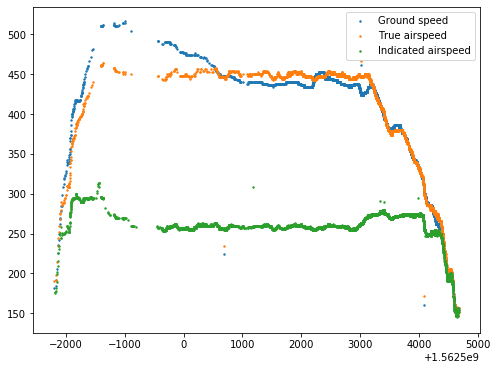

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_ehs.time, df_ehs.gs50, label="Ground speed", s=2)
plt.scatter(df_ehs.time, df_ehs.tas50, label="True airspeed", s=2)
plt.scatter(df_ehs.time, df_ehs.ias60, label="Indicated airspeed", s=2)
plt.legend()
plt.show()